# Variability of dissolved inorganic carbon in the largest karst estuarine lagoon system of the southern Gulf of Mexico

### José Andrés Martínez-Trejo<sup>1</sup>, Jose-Gilberto Cardoso-Mohedano<sup>2,*</sup>, Joan Albert Sanchez-Cabeza<sup>3</sup>, José Martin Hernández Ayón<sup>4</sup>, Ana Carolina Ruiz-Fernández<sup> 3 </sup>, Mario Alejandro Gómez-Ponce <sup>2</sup> , Linda Barranco-Servín<sup>5</sup>, Daniel Pech<sup>5</sup>

<sup> 1 </sup> Posgrado en Ciencias del Mar y Limnología, Universidad Nacional Autónoma de México; Avenida Ciudad Universitaria 3000, C.P. 04510, Coyoacán, Ciudad de México, México

<sup> 2 </sup>  Estación el Carmen, Instituto de Ciencias del Mar y Limnología, Universidad Nacional Autónoma de México, Carretera Carmen-Puerto Real km. 9.5, 24157 Ciudad del Carmen, Campeche, México

<sup> 3 </sup>  Unidad Académica Mazatlán, Instituto de Ciencias del Mar y Limnología, Universidad Nacional Autónoma de México, Calzada Joel Montes Camarena s/n, Colonia Playa Sur, Mazatlán 82000, Sinaloa, México

<sup> 4 </sup>  Instituto de Investigaciones Oceanológicas, Universidad Autónoma de Baja California, Km. 103 CarreteraTijuana-Ensenada, Ensenada, Baja California, México

<sup> 5 </sup> Laboratorio de Biodiversidad Marina y Cambio Climático (BIOMARCCA), El Colegio de la Frontera Sur, Lerma, Campeche, México. 

 \*Corresponding Author: gcardoso@cmarl.unam.mx Phone:+52-938-38-31847

[doi:XXXXX](https://XXXX)


- Raw data are aviable in: 

https://metadata.icmyl.unam.mx/bitstream/handle/20.500.12201/11367/MartinezTrejo_etal_2023_TA_DIC_RawData.csv?sequence=1&isAllowed=y



- Read csv  data file

In [ ]:
# Import packages
import pandas as pd
import PyCO2SYS as pyco2
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import shapiro

In [ ]:
# Function to read in csv file
def read_csv(file):
    """
    Read in csv file and return pandas dataframe
    """
    df = pd.read_csv(file, sep=",", header=0,  decimal=".", encoding='utf-8')
    return df

In [ ]:
# define file path 
terminos_ta_dic_data_path = "../data/MartinezTrejo_etal_2023_TA_DIC_RawData.csv"

# Read in data
terminos_ta_dic_data = read_csv(terminos_ta_dic_data_path)

# Copy data to new dataframe
terminos_ta_dic = terminos_ta_dic_data.copy()

### Calculate DIC / TA ratio 

In [ ]:
# Calculate the ratio of DIC to TA
terminos_ta_dic["DIC/TA"]= terminos_ta_dic["DIC_micromol_kg"]/terminos_ta_dic["TA_micromol_kg"]

## PyCO2SYS configuration from estuarine waters (Humphreys et al. 2022)

In [ ]:
# Copy data to new dataframe
terminos_inorganic_carbon = terminos_ta_dic.copy()

# Create dictionary with data configuration for PyCO2SYS. 
# For more information on the parameters see Humphreys et al (2022)
my_co2sys_params_dic_ta_config = {
    # DIC measured in the lab in μmol/kg-sw
    "par1": terminos_inorganic_carbon["DIC_micromol_kg"],
    # TA measured in the lab, Total scale
    "par2": terminos_inorganic_carbon["TA_micromol_kg"],
    "par1_type": 2,         # tell PyCO2SYS: "par2 is a DIC value"
    "par2_type": 1,         # tell PyCO2SYS: "par1 is a TA value"
    # Fields conditions
    "salinity": terminos_inorganic_carbon["Sal_psu"],  # in-situ salinity in PSU
    # in-situ temperature (output conditions) in °C
    "temperature_out": terminos_inorganic_carbon["Temp_C"],
    "pressure_out": 0.0,
    # Settings
    "opt_pH_scale": 1,     # Total pH (Wolf-Gladrow et al. 2007)
    "opt_k_carbonic": 15,     # 0 < T < 50 °C, 1 < S < 50, Seawater scale, real seawater (Millero F.J. 2010)
    "temperature": 25      # lab temperature (input conditions) in °C
}

### Run PyCO2SYS

In [ ]:
# Run PyCO2SYS to calculate the carbonate system parameters
terminos_inorganic_carbon_results= pyco2.sys(**my_co2sys_params_dic_ta_config)

### Read the interes variables from PYCO2sys 

In [ ]:
# Select variables of interest from the PyCO2SYS output and create a DataFrame
pyco2_interest_variables = pd.DataFrame({
       "pH": terminos_inorganic_carbon_results["pH"],
       "saturation_aragonite": terminos_inorganic_carbon_results["saturation_aragonite"],
       "pCO2_atm": terminos_inorganic_carbon_results["pCO2_out"],
       "k_aragonite": terminos_inorganic_carbon_results["k_aragonite"],
       "total_calcium": terminos_inorganic_carbon_results["total_calcium"],
       "carbonate": terminos_inorganic_carbon_results["carbonate"],
       "CO3": terminos_inorganic_carbon_results["CO3"]
       
})

# Concatenate PyCO2SYS output with the original dataframe
CarbonateTL = pd.concat([terminos_ta_dic, pyco2_interest_variables], axis=1)

### Select Candelaria and Palizada results

In [ ]:
CandelariaResult = CarbonateTL.loc[CarbonateTL["Estuary"] == "Candelaria"]
                     
PalizadaResult = CarbonateTL.loc[CarbonateTL["Estuary"] == "Palizada"]

In [ ]:
#create your own color array (rojo, azul)
my_colors = ["#35b779", "#440154"]
sns.set_theme(font_scale=2, style="ticks", palette= my_colors)
sns.set(font_scale=2, style="ticks", palette= my_colors)

In [177]:
# measure variables dictionary for plotting
measured_variables_dict = {"Sal_psu": "Salinity", 
                           "TA_micromol_kg": f'TA ($\mu mol \; kg^{{-1}}$)',
                           "DIC_micromol_kg": f'DIC ($\mu mol \; kg^{{-1}}$)'}

In [192]:
def plot_variables(data, variable_dict):
    """
    Plot each variable by Area, colored by Season, for each Estuary.

    Parameters:
    data (pandas.DataFrame): DataFrame containing the data
    variable_dict (dict): Dictionary where keys are variable names and values are display names

    Returns:
    None
    """
    n = len(variable_dict)
    estuaries = data["Estuary"].unique()
    m = len(estuaries)

    fig, axs = plt.subplots(n, m, figsize=(7*m, 7*n))

    for i, (variable, display_name) in enumerate(variable_dict.items()):
        for j, estuary in enumerate(estuaries):
            ax = axs[i, j]
            sns.boxplot(x="Area", y=variable,
                        hue="Season", 
                        data=data[data["Estuary"] == estuary],
                        ax=ax,
                        palette= my_colors)  # Use 'viridis' color palette

            ax.set(xlabel='', ylabel=display_name)
            if i == 0 and j == 0:
                ax.legend(title="Season", title_fontsize=20)
            else:
                ax.get_legend().remove()
            ax.set_title(estuary)

            sns.despine(top=False,right=False)

    plt.tight_layout()

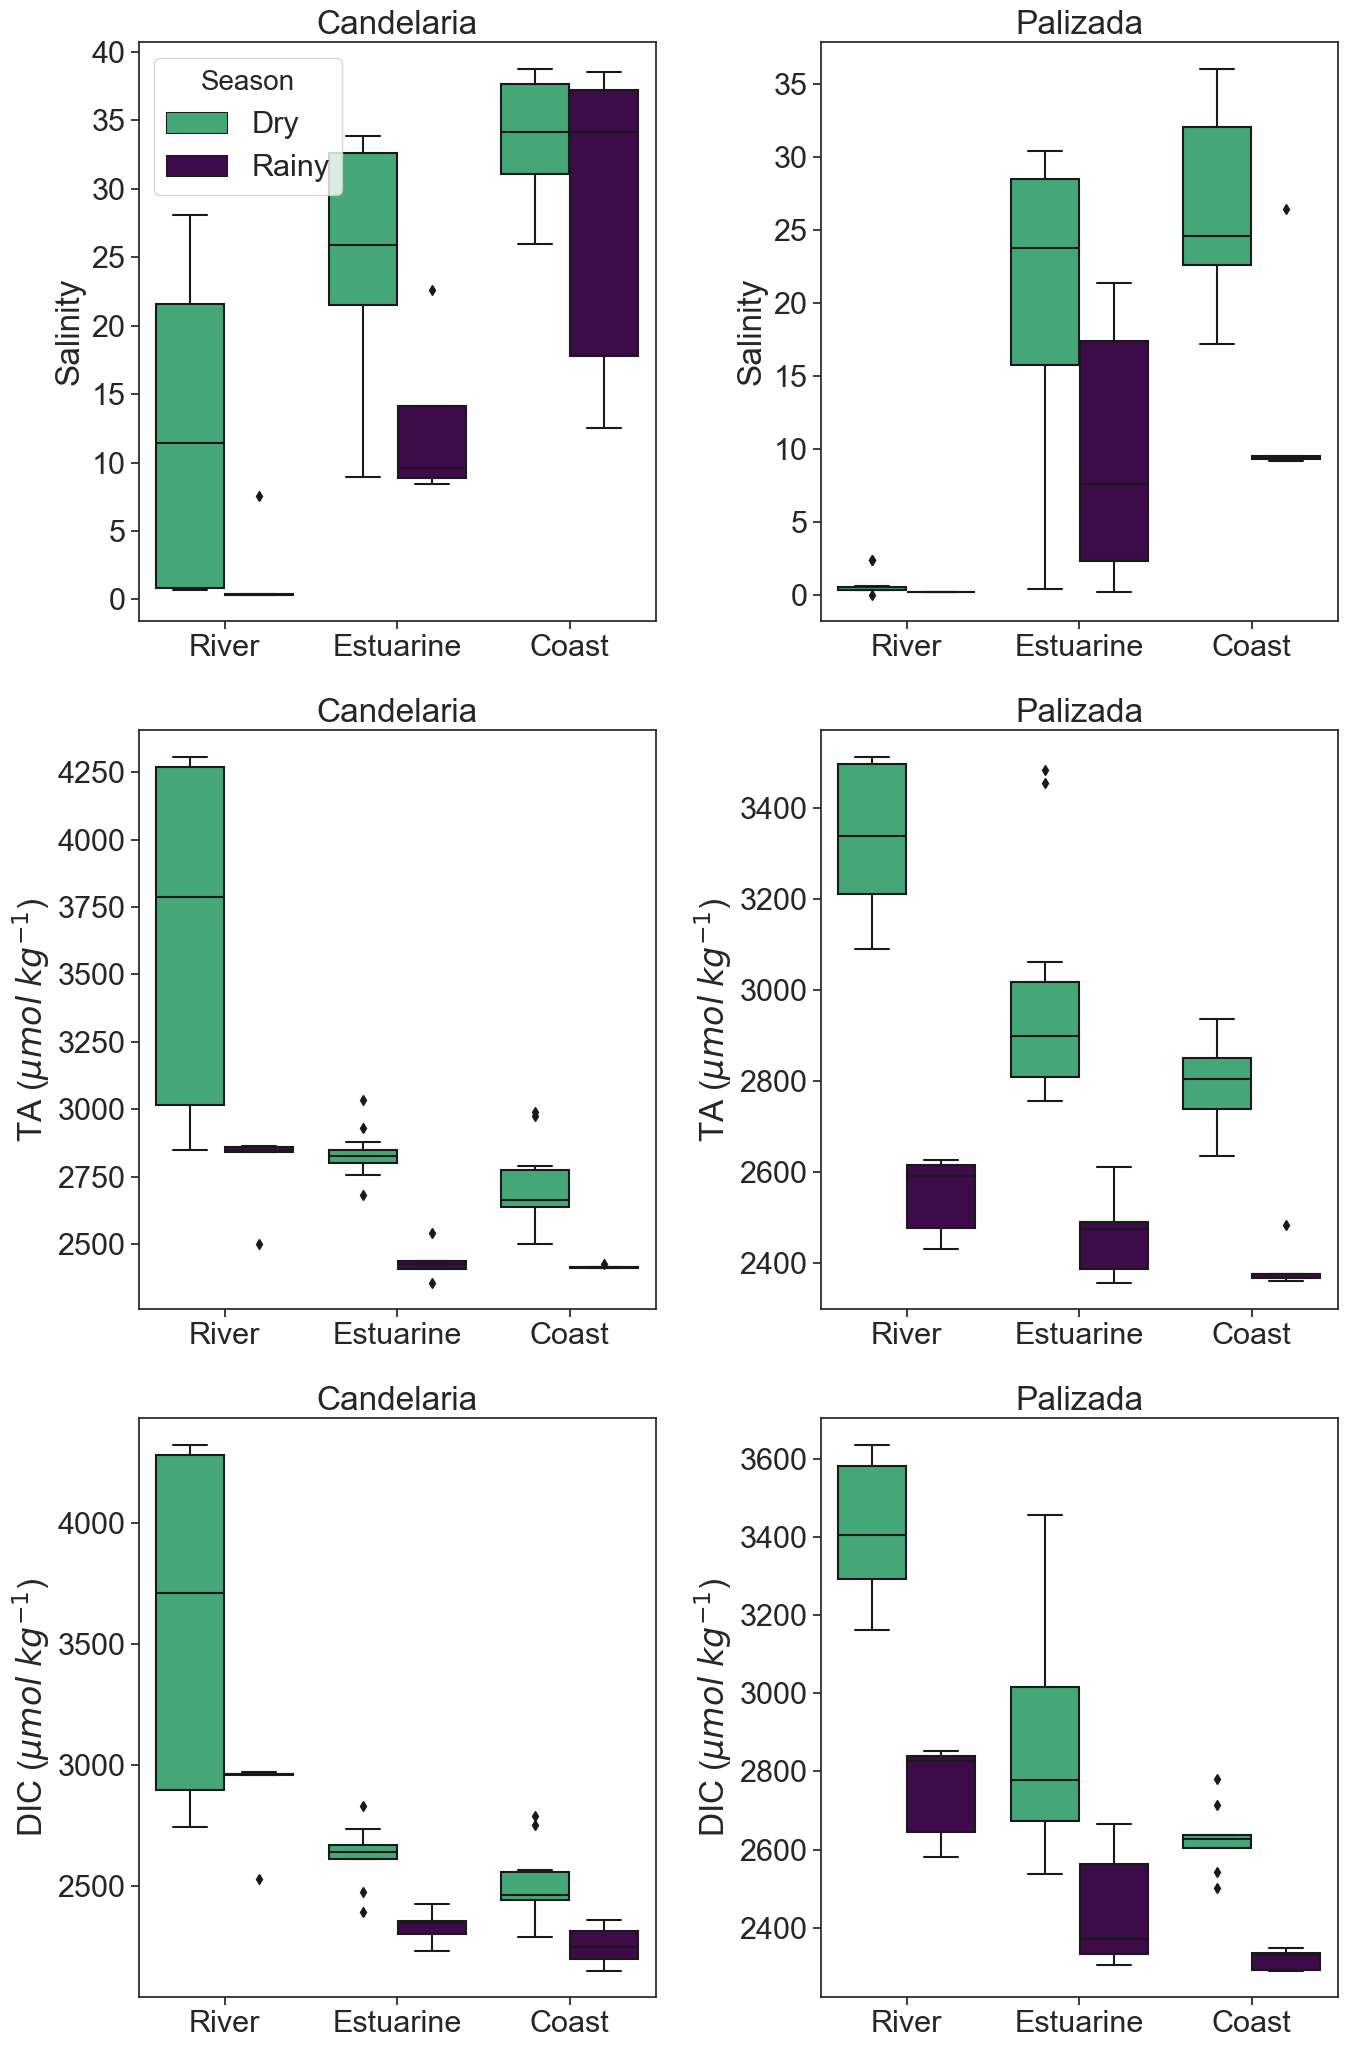

In [193]:
# Export the plot  measuring variables

plot_variables(CarbonateTL, measured_variables_dict)

plt.savefig("../output_files/02_Fig2.pdf", format='pdf')



In [194]:
# calcuated carbonate variables dictionary for plotting
carbonate_variables_dict = {"pH": "pH", 
                            "pCO2_atm" : f'TA ($\mu mol \; kg^{{-1}}$)', 
                            "saturation_aragonite": f'$\Omega Aragonite$'}
